In [1]:
from matplotlib import pyplot as plt
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    14.0
})
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2


from geminids.read_data import *

In [2]:
fig_pth = "../figs"

## Load Data

In [3]:
points, elements, masses = load_all_data()


Loaded ../output/cached/points_0.npy
Loaded ../output/cached/mass_0.npy
Loaded ../output/cached/elements_0.npy
Loaded ../output/cached/points_1.npy
Loaded ../output/cached/mass_1.npy
Loaded ../output/cached/elements_1.npy
Loaded ../output/cached/points_2.npy
Loaded ../output/cached/mass_2.npy
Loaded ../output/cached/elements_2.npy


## Column Densities

In [4]:
n = [100, 100, 1000]
orbit = get_phaethon_orbit()
psp = get_parker_orbit()

for i in range(3):
    p = points[i]
    plot_column_density(p, orbit, psp, 50, 'xy')
    plt.savefig(f"{fig_pth}/column_xy_{i}.eps")
    plt.show()
    
    plot_column_density(p, orbit, psp, 50, 'yz')
    plt.savefig(f"{fig_pth}/column_yz_{i}.eps")
    plt.show()
    
    

(18850000, 5)


KeyboardInterrupt: 

(18850000, 5)
(14780000, 5)


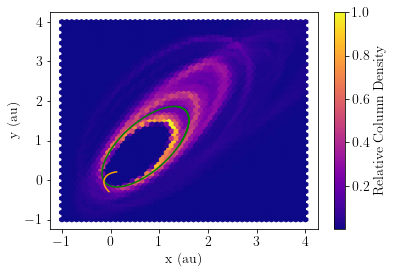

(18850000, 5)
(544000, 5)


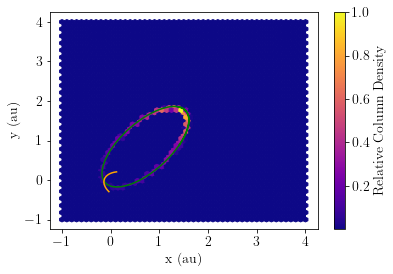

(17364000, 5)
(13364000, 5)


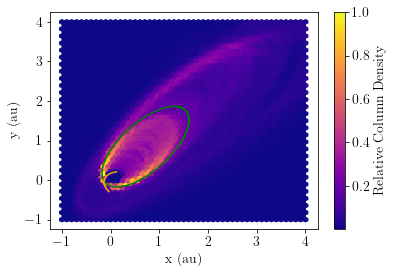

(17364000, 5)
(400000, 5)


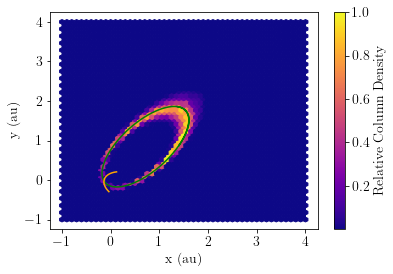

(111606000, 6)
(71616000, 6)


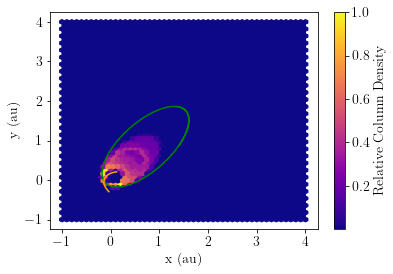

(111606000, 6)
(5400000, 6)


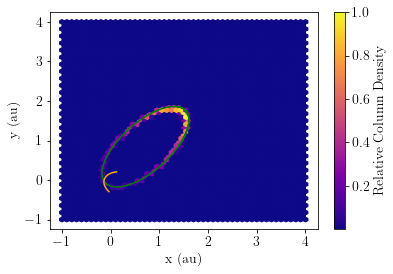

In [9]:
n = [100, 100, 1000]
orbit = get_phaethon_orbit()
psp = get_parker_orbit()

for i in range(3):
    p = points[i]
    plot_column_density(p, orbit, psp, 50, 'xy', max_mass=1e-7, extent=(-1,4,-1,4))
    plt.savefig(f"{fig_pth}/column_xy_low_{i}.eps")
    plt.show()
    
    plot_column_density(p, orbit, psp, 50, 'xy', min_mass=1e-5, extent=(-1, 4, -1,4))
    plt.savefig(f"{fig_pth}/column_yz_high_{i}.eps")
    plt.show()
    
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


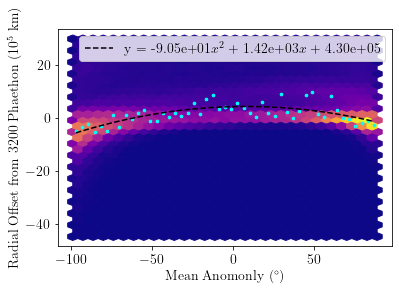

[[ 2.18822465e+02  2.21880618e+03 -6.38732380e+05]
 [ 2.21880618e+03  5.37339328e+05 -3.86640806e+06]
 [-6.38732380e+05 -3.86640806e+06  3.39369301e+09]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


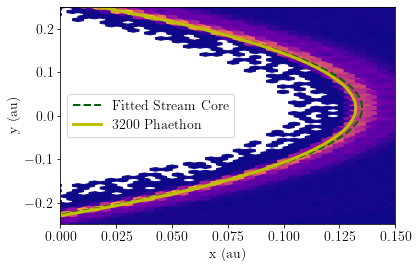

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


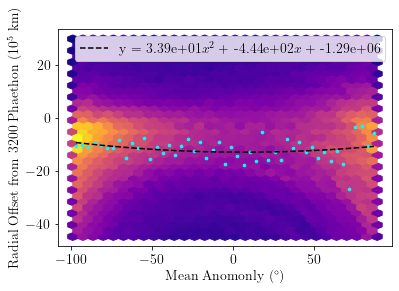

[[ 4.85635758e+02  4.92422797e+03 -1.41754768e+06]
 [ 4.92422797e+03  1.19252469e+06 -8.58077203e+06]
 [-1.41754768e+06 -8.58077203e+06  7.53167016e+09]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


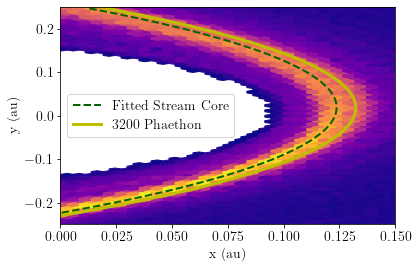

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


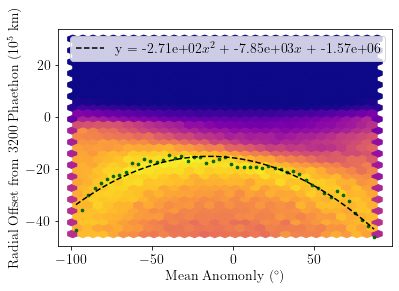

[[ 1.74708038e+02  1.77149677e+03 -5.09964464e+05]
 [ 1.77149677e+03  4.29012179e+05 -3.08694367e+06]
 [-5.09964464e+05 -3.08694367e+06  2.70952731e+09]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


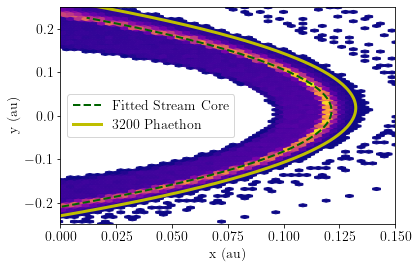

In [10]:
n = [100, 100, 1000]
orbit = get_phaethon_orbit()
psp = get_parker_orbit()
c = ["cyan", "cyan", "darkgreen"]


for i in range(3):
    p = points[i]
    
    peri_fit = fit_perihelion(p, orbit)
    
    corr = plot_residual_fit(peri_fit, color=c[i])
    plt.savefig(f"{fig_pth}/residual_{i}.eps")
    plt.show()
    print(corr)
    
    plot_smoothed_fit(peri_fit)
    plt.savefig(f"{fig_pth}/smooth_fit_{i}.eps")
    plt.show()

## Elements

2.8755584554478495
776.013353340816
2.029063295010027


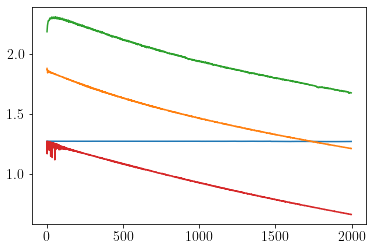

0.42737266785345507
0.5222312848845654
0.44751475911223865


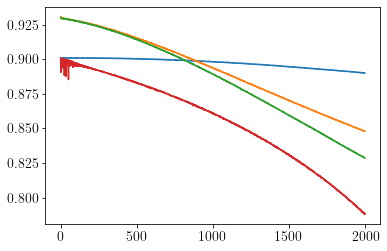

56.57064524306819
58.948012965124946
8.345445409432596


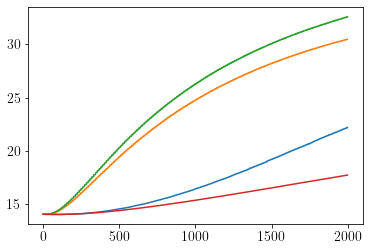

359.9989901542372
359.9983260217824
58.505598727219706


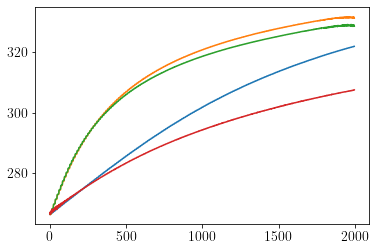

95.79803137389224
138.12021599961733
74.10434469423075


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


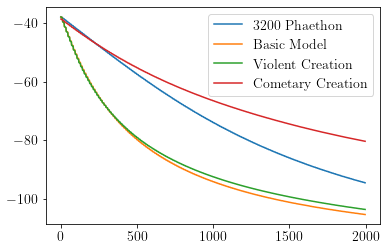

In [11]:
plot_elements(elements[0], elements[1], elements[2], save=True, pth=f"{fig_pth}/elements")

In [12]:
s

1.68

In [13]:
adjustment_factor(1e-5)

7.13755025210828

## Geminids at Earth

In [3]:
points_m5 = []
KDTrees = []
for i in range(3):
    point_m5, KDTree = generate_KDTree(points[i], 1e-5, 0.9, 1.1)
    points_m5.append(point_m5)
    KDTrees.append(KDTree)

rates, long, t = rate_at_earth(points_m5, KDTrees, r=0.03)
calibrated_masses = [calibrated_mass(masses[i], rates[i]) * adjustment_factor(1e-5) for i in range(3)]

print(f"The estimated mass for the BASE model is:\t\t{'{:.2e}'.format(calibrated_masses[0])}")
print(f"The estimated mass for the VEL model is:\t\t{'{:.2e}'.format(calibrated_masses[1])}")
print(f"The estimated mass for the DISTR model is:\t\t{'{:.2e}'.format(calibrated_masses[2])}")

peaks, fwhm = plot_at_earth(rates, 
                      long, 
                      labels=["Basic Model", "Violent Creation", "Cometary Creation"],
                      plot_cmor=True) 
plt.savefig(f"{fig_pth}/rates_at_earth.eps")
plt.show()

print(f"The peak longitude for the BASIC model is:\t{peaks[0]}\t with a full-width, half-max of\t{fwhm[0]}")
print(f"The peak longitude for the VIOLENT model is:\t{peaks[1]}\t with a full-width, half-max of\t{fwhm[1]}")
print(f"The peak longitude for the COMETARY model is:\t{peaks[2]}\t with a full-width, half-max of\t{fwhm[2]}")

NameError: name 'points' is not defined

.0017 closest appoach for vel model

## Spectogram Plots

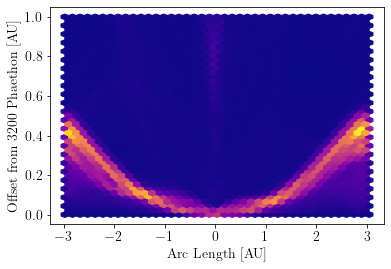

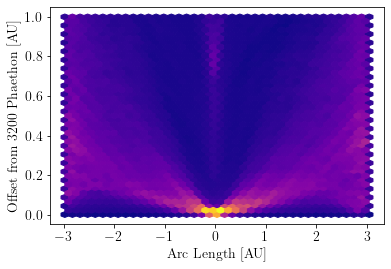

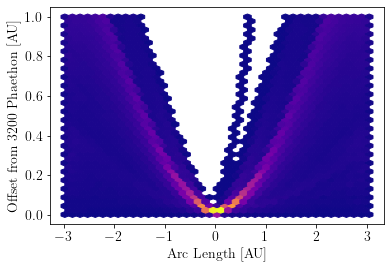

In [ ]:
for i in range(3):
    spectogram_plot(points[i])
    plt.savefig(f"{fig_pth}/spectogram_{i}.eps")
    plt.show()

## PSP

100%|██████████| 800/800 [00:07<00:00, 103.18it/s] 


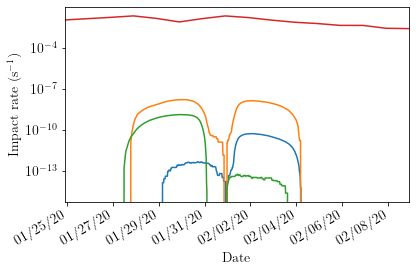

In [4]:
points_kd = []
KDTrees = []
for i in range(3):
    point_kd, KDTree = generate_KDTree(points[i], 0, 0, 0.2)
    points_kd.append(point_kd)
    KDTrees.append(KDTree)

rates, t = rate_at_psp(points, KDTrees, masses, n=800, r =0.05, norm = 1e14)

plot_at_psp(rates, t, ["Basic Model", "Violent Creation", "Cometary Creation"])
plt.tight_layout()
plt.savefig(f"{fig_pth}/rate_at_psp.eps")

In [10]:
np.max(rates[])

1.316252096898255e-09

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


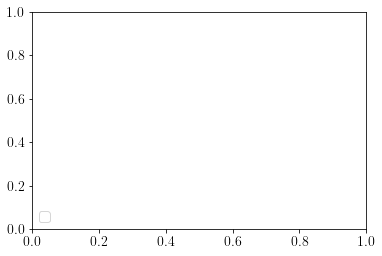

In [ ]:

plt.legend(loc=3)

In [ ]:
np.sum(points[0][points[0][:,3]<asteroidal([.02])[0]][:, 3] * points[0][points[0][:,3]<asteroidal([.02])[0]][:, 4])/masses[0]

0.0006834094374399345

TypeError: list indices must be integers or slices, not tuple

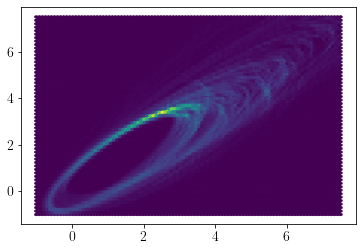

In [ ]:
mask = points[0][:,3] < 1e-8
plt.hexbin(points[0][mask,0], points[0][mask,1], extent=(-1, 7.5,-1,7.5))

x = np.linspace(-.5, 2.5, 50*2)
y = np.linspace(-.5, 2.5, 50*2)
c = np.zeros((50*2)**2)
nx, ny = np.meshgrid(x, y)

poly = plt.hexbin(np.hstack((points[mask,i], nx.flatten())),
                    np.hstack((points[mask,j], ny.flatten())),
                    cmap = "plasma",
                    extent = (-1, 7.5,-1,7.5),
                    gridsize=50,
                    C = np.hstack((points[:,4], c)),
                    reduce_C_function = np.sum)
plt.close()
offsets = poly.get_offsets()
C = poly.get_array()


plt.hexbin(offsets[:,0], offsets[:,1], C=C/np.max(C),
            cmap="plasma", gridsize=50)

In [ ]:
PEAK_DENSITY * 1e6 * 3600

0.06646188850967008

array([0.89002939, 0.89021864, 0.88986176, ..., 0.        , 0.        ,
       0.        ])